# 6.3 Geographical Visualizations

## Table of contents
1. [Importing Libraries & Data](#imports)
2. [Data Wrangling](#paragraph1)
3. [Conduct consistency checks](#paragraph2)
4. [Plotting a choropleth](#paragraph3)
5. [Results](#paragraph4)

### 1. Importing Libraries & Data <a name="imports"></a>

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [20]:
# Propts matplotlib visuals to appear in the notebook 
%matplotlib inline

In [21]:
# Import ".geojson" file for Stockholm
country_geo = r'C:\Users\deuts\Desktop\Airbnb\02 Data\Original Data/neighbourhoods.geojson'   

In [22]:
path = r'C:\Users\deuts\Desktop\Airbnb'

In [23]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'airbnb_df.pkl'))

### 2. Data wrangling <a name="paragraph1"></a>

In [24]:
pd.set_option('display.max_columns', 500)
df.head(17)

,id,name,host_id,host_since,street,neighbourhood,city,state,zipcode,country,latitude,longitude,property_type,bedrooms,price,minimum_nights,availability_365,number_of_reviews,review_scores_rating,host_listings,reviews_per_month,price_group
0,145320,In the middle of it all - with a view!,703851,2011-06-15,"Stockholm, Stockholms laen, Sweden",Soedermalm,Stockholm,Stockholms laen,118 53,Sweden,5.931.364,1.805.256,Apartment,1.0,1285.0,2,0,72,97.0,1,2,High Price
2,170651,Petit Charm Rooftop next to heaven,814021,2011-07-13,"Stockholm, Stockholm County, Sweden",Soedermalm,Stockholm,Stockholm County,11737,Sweden,5.931.568,1.803.138,Apartment,1.0,745.0,3,197,32,93.0,1,0,Middle Price
3,206221,Doubleroom at Soedermalm &trendySofo,1022374,2011-08-26,"Stockholm, Stockholm County, Sweden",Soedermalm,Stockholm,Stockholm County,11639,Sweden,5.931.226,1.807.942,Bed and breakfast,1.0,667.0,3,332,78,98.0,1,0,Middle Price
4,220851,One room in appartement,412283,2011-02-27,"Stockholm, Stockholm County, Sweden",Kungsholmen,Stockholm,Stockholm County,11341,Sweden,5.933.376,1.803.816,Apartment,1.0,598.0,3,336,45,93.0,1,0,Middle Price
5,259722,Near shopping-IT Business(Bunk bed),1261494,2011-10-07,"Stockholm, Stockholm County, Sweden",Rinkeby-Kista,Stockholm,Stockholm County,16474,Sweden,5.941.003,179.366,Apartment,1.0,226.0,21,307,23,92.0,1,0,Low Price
6,273906,Penthouse in central Stockholm,1432722,2011-11-22,"Stockholm, Stockholm County, Sweden",Skarpnaeck,Stockholm,Stockholm County,12068,Sweden,5.930.414,181.068,Apartment,3.0,1962.0,6,242,8,100.0,1,0,High Price
8,278311,Entire apt (some weeks this summer),1452838,2011-11-29,"Farsta, Stockholms laen, Sweden",Farsta,Farsta,Stockholms laen,12331,Sweden,5.924.534,1.808.729,Apartment,1.0,412.0,1,359,51,92.0,1,0,Low Price
9,283446,Comfort Stay @ Kista - Super Value!,1476562,2011-12-06,"Stockholm, Stockholm County, Sweden",Rinkeby-Kista,Stockholm,Stockholm County,16472,Sweden,5.941.533,1.791.465,Apartment,1.0,294.0,2,0,104,97.0,1,1,Low Price
10,301680,one cosy double room for rent,1554143,2012-01-01,"Laangbro, Stockholm County, Sweden",Aelvsjoe,Laangbro,Stockholm County,12533,Sweden,5.927.778,1.799.226,Bed and breakfast,1.0,745.0,1,361,34,92.0,2,0,Middle Price
11,302496,"Spacious, bright, unique apartment",1557657,2012-01-02,"Norrmalm, Stockholm County, Sweden",Norrmalm,Norrmalm,Stockholm County,11351,Sweden,5.934.518,1.806.044,Apartment,3.0,2796.0,5,250,62,99.0,1,0,High Price


In [25]:
df['neighbourhood'].value_counts()

Soedermalm                1498
Norrmalm                   630
Kungsholmen                534
Haegersten-Liljeholmen     533
Oestermalm                 480
Enskede-Aarsta-Vantoer     441
Skarpnaeck                 312
Bromma                     267
Farsta                     132
Aelvsjoe                   107
Haesselby-Vaellingby        90
Rinkeby-Kista               76
Spaanga-Tensta              60
Skaerholmen                 52
Soedermalms                  1
Name: neighbourhood, dtype: int64

In [26]:
# Select only the necessary columns and put them in a list called columns
columns = ['id','price','neighbourhood']

In [27]:
# Creating a subset
city_rec = df[columns]

In [28]:
city_rec

,id,price,neighbourhood
0,145320,1285.0,Soedermalm
2,170651,745.0,Soedermalm
3,206221,667.0,Soedermalm
4,220851,598.0,Kungsholmen
5,259722,226.0,Rinkeby-Kista
...,...,...,...
5454,37900778,1197.0,Oestermalm
5455,37929192,245.0,Skaerholmen
5456,37930728,245.0,Skaerholmen
5457,37937026,461.0,Norrmalm


### 3. Conduct consistency checks <a name="paragraph2"></a>

In [29]:
# Missing data check
city_rec.isnull().sum()

id               0
price            0
neighbourhood    0
dtype: int64

#### No missing values.

In [30]:
# Duplicate check
dups = city_rec.duplicated()

In [31]:
dups.shape

(5213,)

#### No duplicates.

<AxesSubplot:xlabel='price', ylabel='Count'>

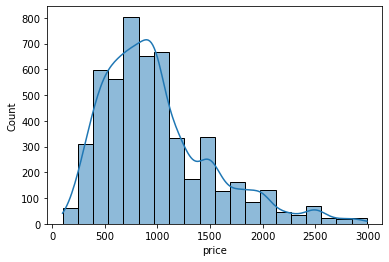

In [32]:
# Checking for extreme values
sns.histplot(city_rec['price'], bins=20, kde = True) # shows extreme values for 'fat'

#### Since the the price very well can be 4000€, I didn't remove this extreme values.

In [33]:
# Checking data types
city_rec.dtypes

id                 int64
price            float64
neighbourhood     object
dtype: object

In [34]:
# Creating data set for average price of each neighbourhood
avg_price_neighbourhood = city_rec.groupby('neighbourhood', as_index=False)['price'].mean()
avg_price_neighbourhood

,neighbourhood,price
0,Aelvsjoe,1017.252336
1,Bromma,929.419476
2,Enskede-Aarsta-Vantoer,860.077098
3,Farsta,786.916667
4,Haegersten-Liljeholmen,842.191370
5,Haesselby-Vaellingby,663.755556
6,Kungsholmen,987.423221
7,Norrmalm,1141.244444
8,Oestermalm,1028.512500
9,Rinkeby-Kista,506.842105


In [35]:
data_to_plot = avg_price_neighbourhood
data_to_plot.head()

,neighbourhood,price
0,Aelvsjoe,1017.252336
1,Bromma,929.419476
2,Enskede-Aarsta-Vantoer,860.077098
3,Farsta,786.916667
4,Haegersten-Liljeholmen,842.191370


In [36]:
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['neighbourhood', 'price'],
    key_on = 'feature.properties.neighbourhood',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Average price per Airbnb listing in SEK").add_to(map)
folium.LayerControl().add_to(map)

map
# !Attention!
# !To view the data the map needs to be zoomend in a lot, since its displaying the price per neighbourhood in stockholm!

#### For neighbourhood reference check this map: 
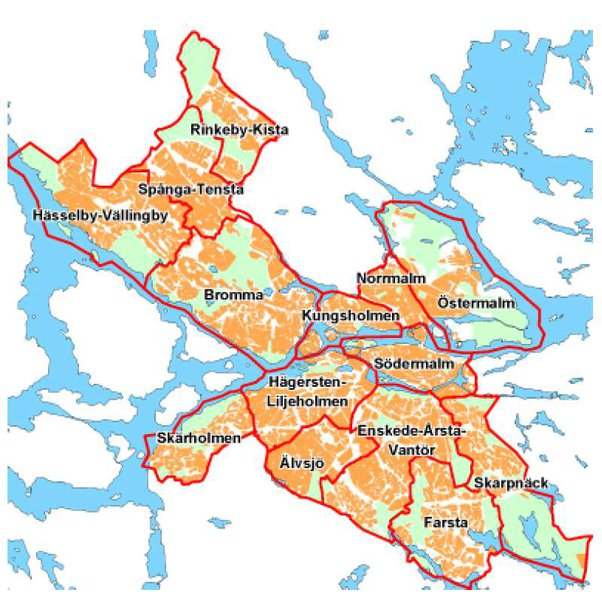

In [37]:
# Exporting map
map.save('average_price_per_listing_map.html')

### 5. Results <a name="paragraph4"></a>

#### How do prices differ from listings in the centrum to listings in the outskirts
#### By simply looking at the choropleth the three neighbourhoods with the darkest shades of red - Norrmalm, Södermalm, and Östermalm can be identified as the naighbourhoods with the highest average prices per airbnb listing. Also the neighbourhoods, that have the cheapest average prices per Airbnb listing can be spotted easily. 
#### New Questions: - Are the neighbourhoods with the higher average prices per Listing also more wealthy neighbourhoods or is the price higher because these neighbourhoods are more central, or both? - How is it in other big cities?